## Welcome to $\pi$

Welcome to Other Math Club page all about $\pi$, a number that goes on as a decimal forever without ever repeating, 3.14159265358979...

Pi starts out 3.14159265358979323846264338327950288419716939937510582097494459230781640628620899862803482534211...

There are many ways to calculate $\pi$ so let's do some here. 


* Calculating $\pi=2\cdot\frac{2}{1}\cdot\frac{2}{3}\cdot\frac{4}{3}\cdot\frac{4}{5}\cdot\frac{6}{5}\cdot\cdot\cdot$


* Calculate $\pi=\sqrt{6\cdot(\frac{1}{1}+\frac{1}{4}+\frac{1}{9}+\frac{1}{16}+\frac{1}{25}+\cdot\cdot\cdot)}$


* Calculate $\pi$ using random numbers (Monte Carlo)


* Calculate $\pi$ by adding up little bits of area


* Calculate $\pi$ by approximating a circle with triangles


* Advanced: Calculate the coordinates of $e^{\frac{i\pi}{2}}$


* Search $\pi$ for a sequence of digits that you choose. 

### Calculate $\pi$ as a product of fractions

We are told (rather mysteriously) that $\pi$ can be written as the product of an infinite number of fractions. We don't have time for infinity but perhaps we can go part way to infinity and see how we do. In the calculation below you get to select **how_many_fractions** and the computer will do the rest for you. If you make **how_many_fractions** larger: Does your estimate of $\pi$ get better? 

$$\frac{\pi}{2}=\frac{2}{1}\cdot\frac{2}{3}\cdot\frac{4}{3}\cdot\frac{4}{5}\cdot\frac{6}{5}\cdot\frac{6}{7}\cdot\frac{8}{7}\cdot\frac{8}{9}\cdot\cdot\cdot$$

In [3]:
#########
## 
## Change this number to experiment with more / fewer fractions
##
how_many_fractions = 3
##
##
#########

my_pi = 2.0

import numpy as np

print 'Here are some numerators and denominators from our calculation:\n'

for i in range(how_many_fractions):
    this_numerator = 2. + 2.*(i/2)
    this_denominator = ((i+1)/2)*2.+1.
    my_pi *= this_numerator / this_denominator
    if i < 6:
        print 'numerator and denominator are %3.1f, %3.1f' % (this_numerator, this_denominator)
    if i == how_many_fractions - 1:
        print '...\n...\n...\nlast two: %3.1f, %3.1f' % (this_numerator, this_denominator)

print '\nAnd now here is our final result:\n'
print("estimated pi = %13.12f, actual pi = %13.12f; so our error was %13.12f" % (my_pi, np.pi, np.pi - my_pi))

print("\nChange the parameter value above: 'how_many_fractions = ...'; is this more accurate?\n")


Here are some numerators and denominators from our calculation:

numerator and denominator are 2.0, 1.0
numerator and denominator are 2.0, 3.0
numerator and denominator are 4.0, 3.0
...
...
...
last two: 4.0, 3.0

And now here is our final result:

estimated pi = 3.555555555556, actual pi = 3.141592653590; so our error was -0.413962901966

Change the parameter value above: 'how_many_fractions = ...'; is this more accurate?



### Calculate $\pi$ as an infinite sum

This is from Euler's solution to the famous **Basel Problem**

$$\frac{\ \pi^2}{6}=\frac{1}{1^2} + \frac{1}{2^2} + \frac{1}{3^2} + \frac{1}{4^2} + \frac{1}{5^2} + \cdot\cdot\cdot$$

As above you will notice we have an equals sign; and something that continues on forever. This time the fractions are added, not multiplied. The denominators will get bigger and bigger: 1, 4, 9, 16, 25, and so on. Here again we see infinity being put inside a box (or maybe a cylinder since it is $\pi$ after all). 

Once we add up all the fractions we multiply by six and take the square root; do you see why? Let's see if this method produces a good approximation of $\pi$ faster than the product of fractions shown above. 


In [4]:
#########
## 
## Change this number to experiment with more / fewer fractions
##
how_many_fractions = 3
##
##
#########

my_estimate = 0.0

import numpy as np

print 'Some denominators from our calculation:\n'

for i in range(how_many_fractions):
    this_denominator = np.power(float(i+1), 2.0)
    my_estimate += 1.0 / this_denominator
    if i < 6: print 'denominator = %.0f       (estimated pi = %6.5f)' % (this_denominator, np.sqrt(6.0*my_estimate))
    if i == how_many_fractions - 1: print '...\n...\n...\nlast one: %.0f' % (this_denominator)

my_estimate = my_estimate * 6.0
my_estimate = np.sqrt(my_estimate)

print '\nAnd now here is our final result:\n'
print("estimated pi = %13.12f, actual pi = %13.12f; so our error was %13.12f" % (my_estimate, np.pi, np.pi - my_estimate))

print("\nMake 'how_many_fractions' bigger to see if this makes your result more accurate!\n")


Some denominators from our calculation:

denominator = 1       (estimated pi = 2.44949)
denominator = 4       (estimated pi = 2.73861)
denominator = 9       (estimated pi = 2.85774)
...
...
...
last one: 9

And now here is our final result:

estimated pi = 2.857738033247, actual pi = 3.141592653590; so our error was 0.283854620343

Make 'how_many_fractions' bigger to see if this makes your result more accurate!



### Calculate $\pi$ using Monte Carlo (random numbers)

Here is a challenge: If you could generate a million random numbers between 0 and 1... how could you use those numbers to calculate $\pi$???

We calculate $\pi$ using random darts. Each dart lands in a square; either inside or outside a circle. We will not be able to calculate pi very *accurately* using this first idea; but approximate will be fun! 

Both of these ideas rely on the notion that the area of a circle with a radius of 1 is pi. The argument for this idea is built into one of the other math club team activities. 

In [7]:
##########
##########
##
## Change nDarts to use more or fewer samples
##
nDarts = 12
##
##########
##########


# This is a Monte Carlo method problem
# This cell takes about 15 seconds to run.
# It throws 4 million darts at a dart board. If they land inside a circle they "count"
# At the end it uses the number of hits to calculate pi.

import numpy as np
import random as r

hits = 0.0
fDarts = float(nDarts)
for i in range(nDarts):
    x = r.random()
    y = r.random()
    if np.sqrt(x*x+y*y) <= 1.0: hits += 1.0

print 4.0*hits/fDarts 
    

3.33333333333


### Calculate $\pi$ by adding up little squares
$\pi$ is associated with circles but we use squares this time. Let's fill in the first quadrant with little squares; and if they are on or in the unit circle we will sum them to estimate the area. This -- we are also told -- should be $\pi$ once more. 

In [8]:
###########
###########
##
## Change the value of 'size_of_square' to see how it affects the approximation of pi.
## If you make this value very small the program will take longer to complete its calculation.
##
size_of_square = 0.1
##
###########
###########


# count up little squares to get pi. Those squares must be inside the unit circle, that is, 
#   the circle at the origin with a radius of 1. 

# We will loop over little boxes at location (x, y).  
# x ranges from 0 to 1 and y ranges from 0 to 1. The total area of this box is what? 
# We only count boxes in our total if they are at a distance of 1 or less from the origin.
# How do we calculate that distance (what is the name of the formula)?
# Once we are done we have looked at only one quadrant of the unit circle.
# Therefore we multiply the answer by what? 

import numpy as np


how_many_squares = int(1.0 / size_of_square)

print 'There are', how_many_squares, 'little squares on one side of the big square.'

area_of_little_square = size_of_square * size_of_square

print 'The little squares have an area of', area_of_little_square, 'square units.'
print '   (a number like 1e-06 is read "one times ten to the minus six" or "one millionth")'

# area is a bucket of variable that will increase when we find little squares inside the circle
area = 0.0

for x in np.arange(0.0, 1.0, size_of_square):
    for y in np.arange(0.0, 1.0, size_of_square):
        dist = np.sqrt(x*x+y*y)
        if dist < 1.0:
            area = area + area_of_little_square

# area is just in the first quadrant; so let's multiply it by four to account for all 4 quadrants
area = area * 4

print 'Our estimate of pi is ', area

# It would be nice to create a little drawing of this

There are 10 little squares on one side of the big square.
The little squares have an area of 0.01 square units.
   (a number like 1e-06 is read "one times ten to the minus six" or "one millionth")
Our estimate of pi is  3.44


#### Extra ideas

It would be pleasant to calculate the volume of a sphere and area of a sphere.

### Advanced: Calculating $\pi$ from arc length

Suppose you are interested in measuring the perimeter of a circle with radius 1. We 'know' that this distance will prove to be about 6.28..., in other words 2 times pi. But can we calculate that in some way? That is what this section attempts to do. The math is a bit technical for middle school; so you may want to read/skim and you can always talk to us to dig deeper.

Imagine you use a compass to draw the circle centered on the origin. Now draw four inscribed lines to make a rotated square: From (1, 0) to (0, 1) to (-1, 0) to (0, -1) back to (1, 0). Each of these lines has a length of (square root of 2) from the pythagorean formula. Let's abbreviate 'square root of 2' as sqrt(2). So our first estimate for the perimeter of the unit circle is 4 x sqrt(2) or about 5.657. This is obviously a low estimate because our square is inscribed inside the circle; it does not follow the curved perimeter very well. 

Here is the important idea for what follows: We can look at this square as an inscribed regular polygon with four sides and we can use it to build another regular polygon with twice as many sides that will be a closer approximation to the shape of the circle... and we can keep on doing this 'doubling' process a whole bunch of times until our polygon looks a lot like the unit circle. Therefore our approximate values for the perimeter should get closer and closer to the right answer. 

In creating these polygons the first vertex is always at (1, 0). The second vertex has coordinates (c, s) based on the central angle subtended by each edge of the polygon. Once we know (c) and (s) we can calculate the distance from there to (1, 0) and multiply that distance by n, the number of vertices / edges in the polygon. That will be our estimate of the perimeter of the circle.

Each time we double the number of vertices n we cut the subtended angle in half. Fortunately the new coordinates (c2, s2) are easy to determine from (c, s) using trigonometry rules. 

Let's calculate pi using a known value of cosine and the 'half angle' formula. This method has both a good and a bad aspect to it. The good aspect is that there is some circular reasoning involved, in particular we are calling the circumference of the unit circle '2 pi' without much justification. On the positive side the calculation itself only involves square roots... so it is a pi-free calculation that approximates pi. 

As Isabella will tell you $$d(e^{i\theta},1)=\sqrt{2-2\cos \theta}$$

Suppose we know s = the arc-length from 1 to pi/4. Then pi is approximately this arc length times eight (because pi/4 fits into 2 * pi eight times. That is the circular reasoning bit. 

If we have a rule for getting cos (theta / 2) then we could get a slightly better estimate of pi by cutting pi/4 in half to get pi/8. Calculate that distance and multiply it by 16 because there are twice as many segments. What we are doing, you see, is inscribing polygons into the unit circle. Each polygon has twice the number of vertices as the previous one. The important equation is the cosine half-angle formula:

$$\cos\left(\frac{\theta}{2}\right)=\sqrt\frac{\cos\theta+1}{2}$$

We can take a recursive approach to this calculation. We can start at pi/4 and call that n=1. That is an octagon inscribed inside the unit circle. Then what is the improved calculation for pi using the half-angle pi/8? Call that n + 1. And then recurse to n + 2, n + 3, n + 4, ...

$$\cos\theta_{n+1}=\sqrt{\frac{\cos\theta_{n}+1}{2}}$$

where

$$\cos\theta_{1}=\frac{\sqrt{2}}{2}$$

and now here is the next estimate of pi: 
    
$$\pi_{n+1} = 2^{2+n}\cdot\sqrt{2-2\cos\theta_{n+1}}$$

(-1.0, 1.0, -1.0, 1.0)

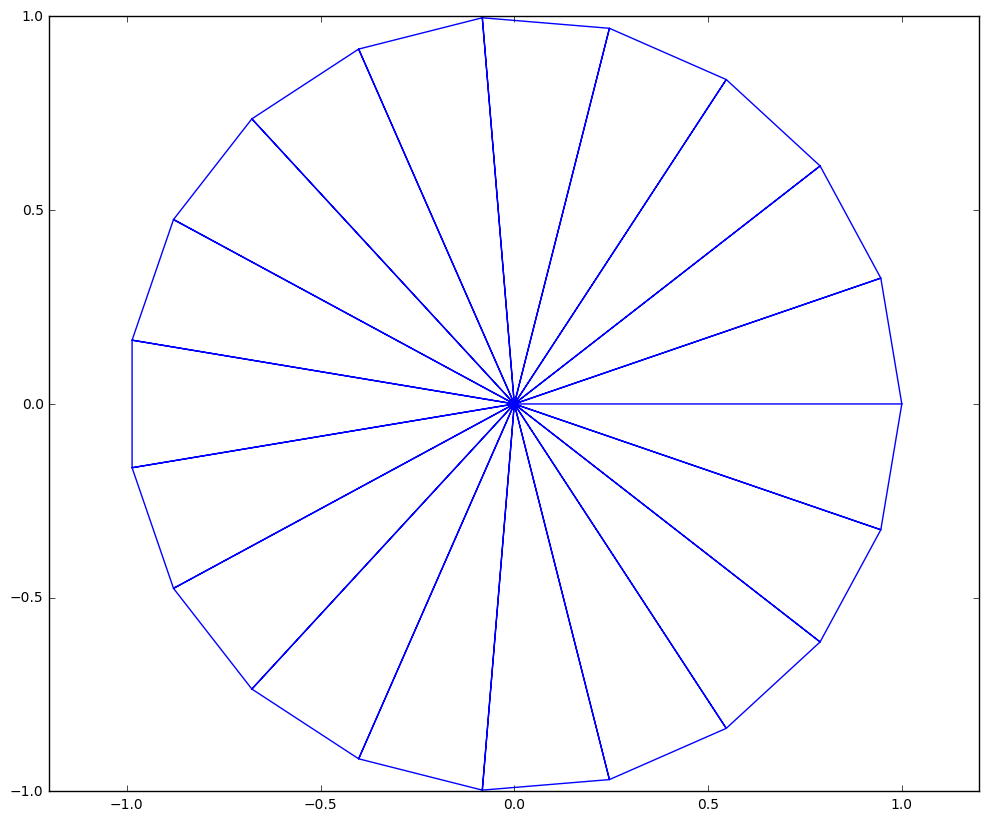

In [10]:
##################
##################
##
## Change n_polygon to affect the plot below
##
n_polygon = 19
##
##################
##################

# This block of code draws a regular polygon which approximates the unit circle

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
dtheta = np.pi*2.0/n_polygon
px = []
py = []
theta = 0.0
for i in range(n_polygon):
    px.append(0.0)
    py.append(0.0)
    px.append(np.cos(theta))
    py.append(np.sin(theta))
    px.append(np.cos(theta+dtheta))
    py.append(np.sin(theta+dtheta))
    theta += dtheta
fig, ax = plt.subplots(figsize=(12,10))
ax.plot(px, py)
ax.axis('equal')

###  Advanced: sine and cosine of 90 degrees

In [11]:
import numpy as np
pi = np.pi
print 'pi is', pi

# let's add up the even-numbered terms... 0, 2, 4... we hope they equal 0 
evenSum = 1 - pi*pi/8 + (pi*pi*pi*pi)/(2*2*2*2)/(4*3*2*1)
print evenSum

pi is 3.14159265359
0.0199689577649


In [12]:
# let's add up the odd-numbered terms... 1, 3, 5... we hope they equal 1
oddSum = pi/2 - (pi*pi*pi)/48 + (pi*pi*pi*pi*pi)/(2*2*2*2*2)/120
print oddSum

1.00452485553


In [13]:
def IsOdd(number):
    if number % 2 == 0: return False
    else: return True

In [14]:
def Factorial(number):
    if number == 0: return 1
    if number == 1: return 1
    if number > 1:
        factorial = 1
        for j in range(number):
            factorial = factorial * (j+1)
        return factorial

In [15]:
def Numerator(number, power):
    return np.power(number, power)

In [16]:
def ThisEvenTerm(x, term):
    termOverTwo = term/2
    if IsOdd(termOverTwo):
        thisSign = -1
    else:
        thisSign = 1
    return thisSign*Numerator(x, term)/Factorial(term)

In [17]:
def ThisOddTerm(x, term):
    termMinusOne = term - 1
    termMinusOneOverTwo = termMinusOne/2
    if IsOdd(termMinusOneOverTwo):
        thisSign = -1
    else:
        thisSign = 1
    return thisSign*Numerator(x, term)/Factorial(term)

In [20]:
##########
##
## make nTerms larger to improve accuracy of this estimate
##
nTerms = 4
##
##########

oddSum = 0.0
evenSum = 0.0
x = pi/2
for term in range(nTerms):
    print term
    if IsOdd(term):
        oddSum = oddSum + ThisOddTerm(x, term)
    else:
        evenSum = evenSum + ThisEvenTerm(x, term)

print 'even sum:', round(evenSum, 8)
print 'odd sum:', round(oddSum, 8)

0
1
2
3
even sum: -0.23370055
odd sum: 0.92483223


In [22]:
########
##
## make nIterations larger to improve accuracy
##
nIterations = 5
##
########

import numpy as np

def next_cos_theta(cos_theta):
    return np.sqrt((cos_theta + 1.0)/2.0)

def next_pi(n, cos_theta):
    return np.power(2.0, 3.0 + n)*np.sqrt(2.0-2.0*cos_theta)


cos_theta_1 = np.sqrt(2.0)/2.0
ct = cos_theta_1
pi_est = []

for n in range(nIterations):
    nct = next_cos_theta(ct)
    nxtpi = next_pi(n, nct)
    print 'iteration', n+1, 'pi estimate', nxtpi
    pi_est.append(nxtpi)
    ct = nct
    


iteration 1 pi estimate 3.12144515226
iteration 2 pi estimate 3.13654849055
iteration 3 pi estimate 3.14033115695
iteration 4 pi estimate 3.14127725093
iteration 5 pi estimate 3.14151380114


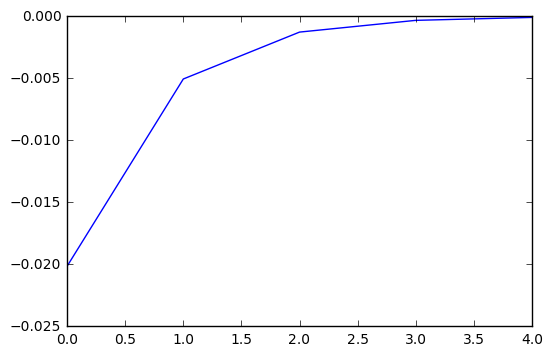

In [24]:
# This cell uses results from the cell above (pi_est): How well did we do?

# make plots inline (so that they do not pop-out)
%matplotlib inline

# get the plotting library going (this is how we make plots)
import matplotlib.pyplot as plt

# math library (this is how we do advanced mathematics using Python)
import numpy as np

# make a little plot going from 0 to 5 in steps of 0.01
pi_err = [x-np.pi for x in pi_est]
plt.plot(pi_err)

### Finding digits in pi

To use this next block of Python code: Find the **line my_digits = '#####'** and change ##### to anything you like. Then run the cell. It will search digits of pi for whatever you choose. You should start with just a couple of digits to start with to make sure it works. Longer strings (6 digits or more) will take longer to search and may run out of digits of pi before they find a solution. 

**WARNING: This section only works if the digits of pi are in place. If it doesn't work you will see an error message instead of an answer.**


In [26]:
# Run this to get the digits-of-pi data file
!curl https://raw.githubusercontent.com/robfatland/othermathclub/master/data/pi.txt -o pi.txt -s


In [28]:
# **************************
# Put your digits here! (replace whatever is inside the single-quotes)
# **************************

my_digits = '77774'

# **************************
# When you are done with that hold down Shift and press Enter!
# **************************

def iter_file(filename, chunksize=100000):
    with open(filename) as f:
        while True:
            substring = f.read(chunksize)
            if not substring:
                return
            # for Python 3
            # yield from substring
            # for Python 2
            for char in substring:
                yield char

from toolz import sliding_window

def look_for_sequence(filename, sequence):
    s = iter_file(filename)

    for i, group in enumerate(sliding_window(len(sequence), s)):
        if ''.join(group) == sequence:
            print ('found your sequence "{0}" at location {1} in pi'.format(sequence, i))
            break
            

# 'data/pi.txt' is the first one million digits of pi
# 'data/pi-billion.txt' is the first one billion digits of pi


look_for_sequence('/home/nbuser/pi.txt', my_digits)

found your sequence "77774" at location 5242 in pi


In [22]:
import numpy as np
pi = np.pi
print pi
print "1. ", round(4*4.5*3+(11-2*4.5)*(6+3+3), 2)
print 'TB got 66 for number 1'
print "2. ", round(2.5*14+pi*3.5**2/2-pi*1.5**2/2, 2)
print "3. ", round(1.456,2)
print "4. ", round(1.456,2)
print "5. ", round(1.456,2)
print "6. ", round(1.456,2)
print "7. ", round(1.456,2)
print "8. ", round(1.456,2)
print "9. ", round(1.456,2)




3.14159265359
1.  78.0
TB got 66 for number 1
2.  50.71
3.  1.46
4.  1.46
5.  1.46
6.  1.46
7.  1.46
8.  1.46
9.  1.46


In [24]:
# The answers of TD
import numpy as np
pi = np.pi
print "just to be sure: pi is ", pi
print "1. ", round(4*4.5*3+(11-2*4.5)*(6+3+3), 2)
print '      ...66?'
print "2. ", round(2.5*14+pi*3.5**2/2-pi*1.5**2/2, 2)
print "3. ", round(3*2*5+2*10,2)
print "4. ", round(pi*5.5**2-pi*2.5**2,2)
print "5. ", round(0.5*(pi*4.5**2-pi*2.5**2),2)
print "6. ", round(3.5*10.9+3.5*12.75,2)
print '      ...70.53?'
print "7. ", round(pi*5**2-pi*2.5**2,2)
print '      ...78.5?'
print "8. ", round(3*2.35*10.2+(12.5-10.2)*(2.35*5),2)
print "9. ", round(pi*4**2-pi*2**2,2)
print " "
print "Order is 5 9 3 2 7 4 1 6 8, spelling out COMPOSITE"

just to be sure: pi is  3.14159265359
1.  78.0
      ...66?
2.  50.71
3.  50.0
4.  75.4
5.  21.99
6.  82.78
      ...70.53?
7.  58.9
      ...78.5?
8.  98.94
9.  37.7
 
Order is 5 9 3 2 7 4 1 6 8, spelling out COMPOSITE
